## Modeling

In [1]:
import yaml 
import numpy 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import DirectoryIterator, ImageDataGenerator
import os

In [74]:
import os
from dotenv import load_dotenv
load_dotenv()
IMAGE_DIR_NONABSTRACT=os.getenv('IMAGE_DIR_NONABSTRACT')
CONFIG_LOCATION=os.getenv('CONFIG_LOCATION')
IMAGE_DIR_ABSTRACT=os.getenv('IMAGE_DIR_ABSTRACT')

In [ ]:
import glob
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [73]:
def load_config():
    with open(CONFIG_LOCATION) as f:
        try:
            config = yaml.safe_load(f)
            print("Config Loaded Successfully")
            return config
        except Exception as e:
            print(e)
            return ""

In [5]:
config = load_config()

Config Loaded Successfully


In [10]:
img_dir = IMAGE_DIR_ABSTRACT
def preprocess_images(resize_height, resize_width, show=False):

    images = []
    counter = 0
    for f in glob.glob(f'{img_dir}*.jpg'):
        print(f"Image {counter}")
        img = cv2.imread(f)
        new_img = cv2.resize(img, (resize_height,resize_width))
        
        if show==True:
            plt.imshow(new_img)
            plt.show()

        #plt.imsave(f'./images_processed/train/{counter}.jpg', new_img)
        cv2.waitKey(0)

        #switch color channels
        #new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)

        #save as np array and add to array
        img_np = np.asarray(new_img) / 255.
        images.append(img_np)

        print(f"...complete")
        counter += 1
    images = np.array(images)
    return images

data = preprocess_images(480,720, show=False)

Image 0
...complete
Image 1
...complete
Image 2
...complete
Image 3
...complete
Image 4
...complete
Image 5
...complete
Image 6
...complete
Image 7
...complete
Image 8
...complete
Image 9
...complete
Image 10
...complete
Image 11
...complete
Image 12
...complete
Image 13
...complete
Image 14
...complete
Image 15
...complete
Image 16
...complete
Image 17
...complete
Image 18
...complete
Image 19
...complete
Image 20
...complete
Image 21
...complete
Image 22
...complete
Image 23
...complete
Image 24
...complete
Image 25
...complete
Image 26
...complete
Image 27
...complete
Image 28
...complete
Image 29
...complete
Image 30
...complete
Image 31
...complete
Image 32
...complete
Image 33
...complete
Image 34
...complete
Image 35
...complete
Image 36
...complete
Image 37
...complete
Image 38
...complete
Image 39
...complete
Image 40
...complete
Image 41
...complete
Image 42
...complete
Image 43
...complete
Image 44
...complete
Image 45
...complete
Image 46
...complete
Image 47
...complete
Im

In [11]:
data.shape

(90, 720, 480, 3)

In [12]:
data_32 = data.astype(np.float32)

In [13]:
data_32_flip = np.flip(data_32, axis=0)
data_32_flip.shape

(90, 720, 480, 3)

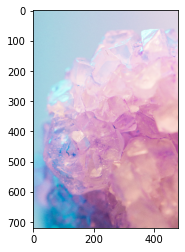

In [35]:
plt.imshow(data_32[5])

In [38]:
data_32[5].shape

(720, 480, 3)

In [50]:
y_selected_image = data_32[5]
y_static = np.expand_dims(y_selected_image,0)
#np.tile(y_selected_image,(len(data_32))).shape
y_static = np.repeat(y_static, len(data_32), axis=0)

In [14]:
model = keras.models.Sequential([
        #encoder
        #layers.Conv2D(64, kernel_size=3, activation='relu'),
        #layers.MaxPool2D(),
        layers.Conv2D(22,kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),
        layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),
        layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D((2,2)),
        # decoder
        layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(24, kernel_size=3, strides=2, activation='relu', padding='same'),
        #layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2D(15, kernel_size=3, activation='relu', padding='same'),
        layers.Conv2D(3, kernel_size=3, activation='relu', padding='same')
        #layers.Conv2D(32, kernel_size=3, activation='relu'),
        #layers.UpSampling2D(),
        #layers.Conv2D(10, kernel_size=3, activation='relu'),
        #layers.Conv2D(3, kernel_size=3, activation='sigmoid')
])

In [15]:
loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
model.compile(optimizer='adam', loss=loss, metrics=['mse'])

In [58]:
#model.build(input_shape=[1,720,480,3])
#model.summary()
# original setup
#history = model.fit(x=data_32, y=data_32, epochs=50, batch_size=16)
# reverese setup
#history = model.fit(x=data_32, y=data_32_flip, epochs=500, batch_size=16)
# linking images to a signle image 
history = model.fit(x=data_32, y=y_static, epochs=500, batch_size=16)

ep - loss: 0.0184 - mse: 0.0184
Epoch 293/500
6/6 [==============================] - 2s 351ms/step - loss: 0.0187 - mse: 0.0187
Epoch 294/500
6/6 [==============================] - 2s 352ms/step - loss: 0.0186 - mse: 0.0186
Epoch 295/500
6/6 [==============================] - 2s 351ms/step - loss: 0.0184 - mse: 0.0184
Epoch 296/500
6/6 [==============================] - 2s 351ms/step - loss: 0.0185 - mse: 0.0185
Epoch 297/500
6/6 [==============================] - 2s 351ms/step - loss: 0.0191 - mse: 0.0191
Epoch 298/500
6/6 [==============================] - 2s 350ms/step - loss: 0.0188 - mse: 0.0188
Epoch 299/500
6/6 [==============================] - 2s 351ms/step - loss: 0.0186 - mse: 0.0186
Epoch 300/500
6/6 [==============================] - 2s 353ms/step - loss: 0.0187 - mse: 0.0187
Epoch 301/500
6/6 [==============================] - 2s 350ms/step - loss: 0.0182 - mse: 0.0182
Epoch 302/500
6/6 [==============================] - 2s 351ms/step - loss: 0.0182 - mse: 0.0182
Epoch 30

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 720, 480, 22)      616       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 360, 240, 22)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 360, 240, 32)      6368      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 180, 120, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 120, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 60, 64)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 180, 120, 64)     

In [60]:
result = model.predict(data_32)

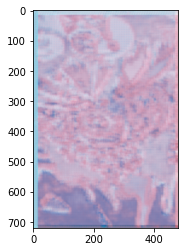

In [61]:
plt.imshow(result[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


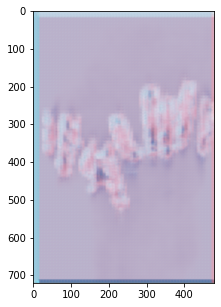

In [62]:
plt.figure(figsize=[5,5])
plt.imshow(model.predict(data_32[50:55]*0.5)[1,:,:,:])


In [63]:
img_dir = IMAGE_DIR_NONABSTRACT

test_img_data = preprocess_images(480,720, show=False)

Image 0
...complete
Image 1
...complete
Image 2
...complete
Image 3
...complete
Image 4
...complete
Image 5
...complete
Image 6
...complete
Image 7
...complete
Image 8
...complete
Image 9
...complete
Image 10
...complete
Image 11
...complete
Image 12
...complete
Image 13
...complete
Image 14
...complete
Image 15
...complete
Image 16
...complete
Image 17
...complete


In [64]:
test_img_result = model.predict(test_img_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


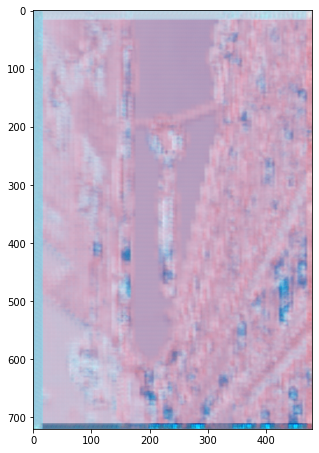

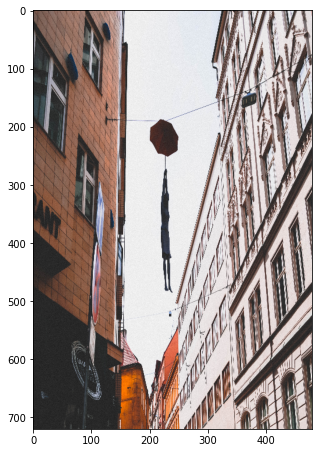

In [65]:
plt.figure(figsize=[5,10])
plt.imshow(test_img_result[10], cmap='jet')

plt.figure(figsize=[5,10])
plt.imshow(test_img_data[10])


## Reverse Model to Try and Figure out Original Picture After Being Trained on Random Images Not Matching Each Other

In [66]:
history_back_to_og = model.fit(x=result, y=data_32, epochs=500, batch_size=16)

Epoch 1/500
6/6 [==============================] - 2s 347ms/step - loss: 0.1258 - mse: 0.1258
Epoch 2/500
6/6 [==============================] - 2s 349ms/step - loss: 0.1047 - mse: 0.1047
Epoch 3/500
6/6 [==============================] - 2s 347ms/step - loss: 0.0955 - mse: 0.0955
Epoch 4/500
6/6 [==============================] - 2s 348ms/step - loss: 0.0954 - mse: 0.0954
Epoch 5/500
6/6 [==============================] - 2s 348ms/step - loss: 0.0932 - mse: 0.0932
Epoch 6/500
6/6 [==============================] - 2s 348ms/step - loss: 0.0931 - mse: 0.0931
Epoch 7/500
6/6 [==============================] - 2s 347ms/step - loss: 0.0916 - mse: 0.0916
Epoch 8/500
6/6 [==============================] - 2s 350ms/step - loss: 0.0925 - mse: 0.0925
Epoch 9/500
6/6 [==============================] - 2s 358ms/step - loss: 0.0912 - mse: 0.0912
Epoch 10/500
6/6 [==============================] - 2s 352ms/step - loss: 0.0922 - mse: 0.0922
Epoch 11/500
6/6 [==============================] - 2s 363m

KeyboardInterrupt: 

In [25]:
# original training set
original_image_estimation = model.predict(result)
# new test set
original_image_estimation_test = model.predict(test_img_data)


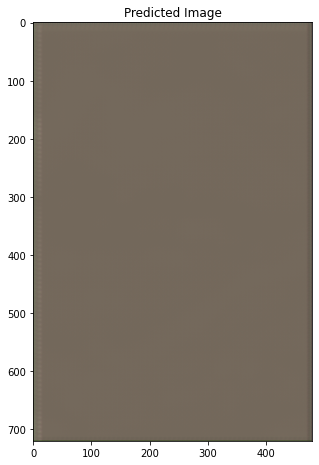

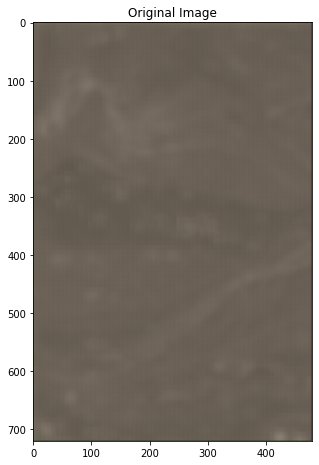

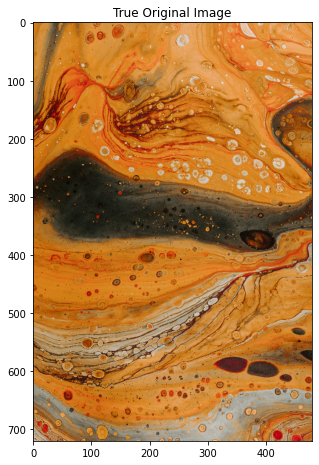

In [26]:
img_num = 55  # cool photos index: 15

plt.figure(figsize=[5,10])
plt.title("Predicted Image")
plt.imshow(original_image_estimation[img_num])

plt.figure(figsize=[5,10])
plt.title("Original Image")
plt.imshow(result[img_num])


plt.figure(figsize=[5,10])
plt.title("True Original Image")
plt.imshow(data_32[img_num])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


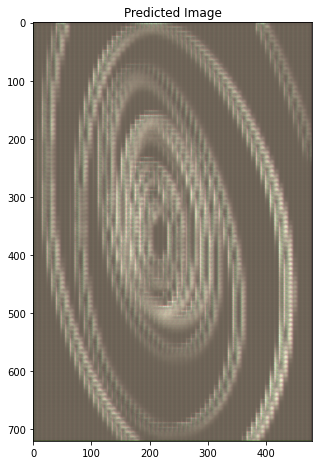

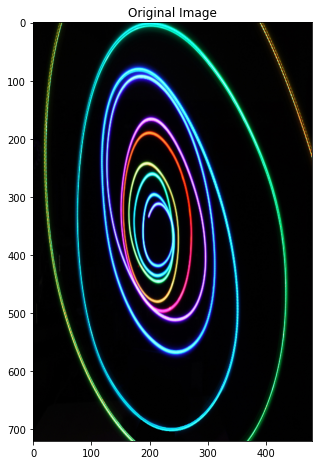

In [34]:
img_num = 17

plt.figure(figsize=[5,10])
plt.title("Predicted Image")
plt.imshow(original_image_estimation_test[img_num])

plt.figure(figsize=[5,10])
plt.title("Original Image")
plt.imshow(test_img_data[img_num])